In [210]:
# importing classes

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [212]:
#generating images  for training set

In [213]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True)

In [214]:
#generating images for test data

In [215]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [216]:
#generating training set

In [217]:
training_set = train_datagen.flow_from_directory('training_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [218]:
#generating test data

In [219]:
test_set = test_datagen.flow_from_directory('test_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [221]:
model=Sequential()

In [222]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [223]:
#adding convolution layer

In [224]:
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [225]:
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [226]:
#adding 2nd convolution layer

In [227]:
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [228]:
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [229]:
#flattening

In [230]:
model.add(Flatten())

In [231]:
# adding ANN layer

In [232]:
model.add(Dense(units=128, activation='relu'))

In [233]:
#output layer

In [234]:
model.add(Dense(units=1, activation='sigmoid'))

#compiling

In [235]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [236]:
model.fit(training_set,epochs = 25,validation_data = test_set,batch_size=64)

Epoch 1/25
251/251 [==============================] - 84s 336ms/step - loss: 0.6630 - accuracy: 0.5938 - val_loss: 0.5875 - val_accuracy: 0.7024
Epoch 2/25
251/251 [==============================] - 81s 322ms/step - loss: 0.5853 - accuracy: 0.6934 - val_loss: 0.5345 - val_accuracy: 0.7336
Epoch 3/25
251/251 [==============================] - 81s 322ms/step - loss: 0.5463 - accuracy: 0.7252 - val_loss: 0.5113 - val_accuracy: 0.7553
Epoch 4/25
251/251 [==============================] - 82s 326ms/step - loss: 0.5056 - accuracy: 0.7525 - val_loss: 0.5005 - val_accuracy: 0.7588
Epoch 5/25
251/251 [==============================] - 86s 342ms/step - loss: 0.4935 - accuracy: 0.7623 - val_loss: 0.4729 - val_accuracy: 0.7756
Epoch 6/25
251/251 [==============================] - 81s 323ms/step - loss: 0.4743 - accuracy: 0.7725 - val_loss: 0.4958 - val_accuracy: 0.7687
Epoch 7/25
251/251 [==============================] - 80s 318ms/step - loss: 0.4575 - accuracy: 0.7819 - val_loss: 0.4669 - val_ac

<AxesSubplot:>

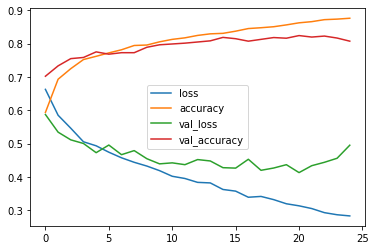

In [237]:
df2=pd.DataFrame(model.history.history)
df2.plot()